# Matplotlib 
###  参考　http://matplotlib.org/


In [3]:
%matplotlib inline

## 1. 图的基本组成 

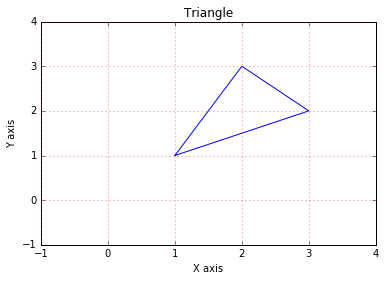

In [17]:
from matplotlib import pyplot as plt

x = [1,2,3,1]
y = [1,3,2,1]

plt.plot(x,y)

plt.title('Triangle')
plt.ylabel('Y axis')
plt.xlabel('X axis')

#plt.xticks([1,6])＃只显示设置的横坐标
#plt.yticks([1,6])
#plt.xticks([1,6],['a','b'])

plt.ylim([-1,4])
plt.xlim([-1,4])

plt.grid(True,color='r')#网格

plt.show()

## 2. 样式 

### maker参考　http://www.labri.fr/perso/nrougier/teaching/matplotlib/#line-properties

### 数据线的样式设置

    颜色缩写    全称
    b          blue
    c          cyan
    g          gree
    k          black
    m          magenta
    r          red
    w          white
    y          yellow
   
   
    线型缩写    含义
    --         --虚线
    -.         -.虚线
    :          .虚线
    -          实线
    
 
    
    

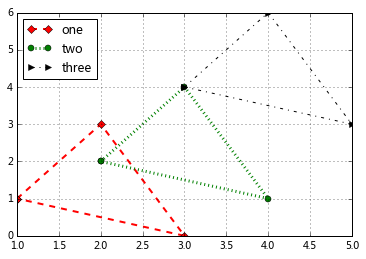

In [11]:
from matplotlib import pyplot as plt
import numpy as np

x = [1,2,3,1]
y = [1,3,0,1]

# np.array将列表转换成numpy的数组后可以支持广播broadcast运算
plt.plot(x,y,color='r',linewidth='2',linestyle='--',marker='D', label='one')
plt.plot(np.array(x)+1,np.array(y)+1,color='g',linewidth='3',linestyle=':',marker='o', label='two')
plt.plot(np.array(x)+2,np.array(y)+3,color='k',linewidth='1',linestyle='-.',marker='>', label='three')

plt.grid(True)
plt.legend()
#plt.legend(loc='upper left')

plt.show()

## 3.  公式TeX, 文本和标注支持

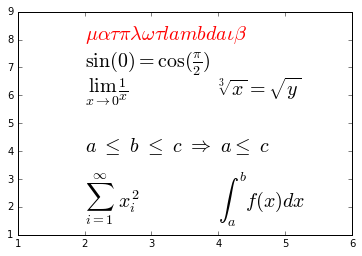

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure() #figsize=(10,6)
ax= fig.add_subplot(111)
ax.set_xlim([1, 6]);
ax.set_ylim([1, 9]);
ax.text(2, 8,  r"$ \mu \alpha \tau \pi \lambda \omega \tau \
    lambda \iota \beta $",color='r',fontsize=20);

ax.text(2, 6, r"$ \lim_{x \rightarrow 0} \frac{1}{x} $",fontsize=20);
ax.text(2, 4, r"$ a \ \leq \ b \ \leq \ c \ \Rightarrow \ a \
    \leq \ c$",fontsize=20);
ax.text(2, 2, r"$ \sum_{i=1}^{\infty}\ x_i^2$",fontsize=20);
ax.text(2, 7, r"$ \sin(0) = \cos(\frac{\pi}{2})$",fontsize=20);
ax.text(4, 6, r"$ \sqrt[3]{x} = \sqrt{y}$",fontsize=20);
 
ax.text(4, 2, r"$ \int_a^b f(x)dx$",fontsize=20);
plt.show()

Annotate各种格式可参考文档

http://matplotlib.org/users/annotations_guide.html#annotating-with-arrow

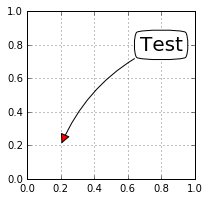

In [24]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

ann = ax.annotate("Test",
                  xy=(0.2, 0.2), #箭头位置
                  xytext=(0.8, 0.8), #文本位置
                  size=20,va="center",ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),#文本外框样式
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2",
                                  fc="r"), 
                  )
ax.grid(True)
plt.show()

## 4. 多子图结构

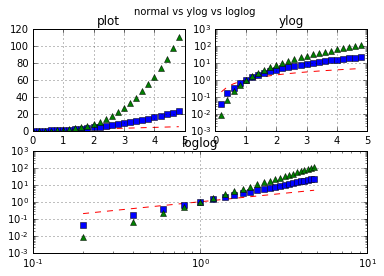

In [28]:
from matplotlib import pyplot as plt
import numpy as np

# arange类似python里的range
t = np.arange(0, 5, 0.2)

fig = plt.figure()#创建图像


#行, 列, 序号
ax1 = fig.add_subplot(221) #在２＊２的图像中占第一格
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
ax1.grid(True)
ax1.set_title('plot')

ax2.semilogy(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
ax2.grid(True)
ax2.set_title('ylog')

ax3.loglog(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
ax3.grid(True)
ax3.set_title('loglog')

fig.suptitle('normal vs ylog vs loglog')
#fig.subplots_adjust(hspace=0.4)

plt.show()

## 5.3D效果

### (1)

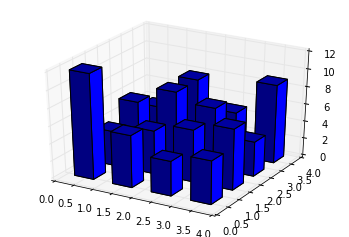

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4)

elements = (len(xedges) - 1) * (len(yedges) - 1)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

### (2)

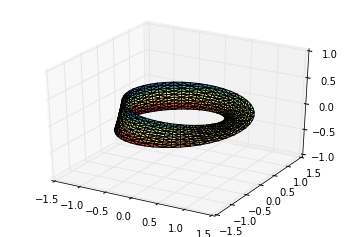

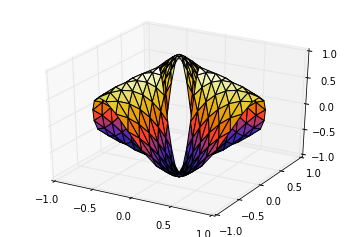

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

# u, v are parameterisation variables
u = (np.linspace(0, 2.0 * np.pi, endpoint=True, num=50) * np.ones((10, 1))).flatten()
v = np.repeat(np.linspace(-0.5, 0.5, endpoint=True, num=10), repeats=50).flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# The triangles in parameter space determine which x, y, z points are
# connected by an edge
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)

ax.set_zlim(-1, 1)

# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# tripcolor plot.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)
plt.show()